In [1]:
import sys
import os
# Append the library path to PYTHONPATH, so library can be imported.
sys.path.append(os.path.dirname(os.getcwd()))
import shutil
import datetime

import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler

from library import plot, bs
from library import network as nw
from library import common as cm

Using TensorFlow backend.


In [2]:
%run setup.py
%load_ext autoreload
%autoreload 2

%run Load_Clean_aux.py normal

seed = 666
np.random.seed(seed)

Loading Normal data sets!

Load and clean the training and validation data.
Original data size is 640874
We remove in-the-money samples. 323786 samples (50.52%) are removed. We have 49.48% of original data left, yielding a size of 317088.
We shrink moneyness range. 0 samples (0.00%) are removed. We have 49.48% of original data left, yielding a size of 317088.
We remove samples when S1 is not available. 2929 samples (0.92%) are removed. We have 49.02% of original data left, yielding a size of 314159.


Clean and load all Monte Carlo test data.

Load Monte Carlo set 1
We remove in-the-money samples. 84872 samples (51.03%) are removed. We have 48.97% of original data left, yielding a size of 81436.
We shrink moneyness range. 0 samples (0.00%) are removed. We have 48.97% of original data left, yielding a size of 81436.
We remove samples when S1 is not available. 3225 samples (3.96%) are removed. We have 47.03% of original data left, yielding a size of 78211.


Load Monte Carlo set 2
We rem

We remove in-the-money samples. 74724 samples (50.27%) are removed. We have 49.73% of original data left, yielding a size of 73928.
We shrink moneyness range. 0 samples (0.00%) are removed. We have 49.73% of original data left, yielding a size of 73928.
We remove samples when S1 is not available. 2158 samples (2.92%) are removed. We have 48.28% of original data left, yielding a size of 71770.




In [3]:
if FEATURE_SET == 'normal_feature':
    ori_fea = ['M0', 'tau0_implvol0']
    sub_res = res_dir + 'Network/Normal_Feature/'

if FEATURE_SET == 'delta_vega':
    ori_fea = ['delta_bs', '1_over_sqrt_tau', 'vega_n']
    sub_res = res_dir + 'Network/Delta_Vega/'
    
if VIX:
    ori_fea += ['fake_vix']

    
os.makedirs(sub_res, exist_ok=True)

In [4]:
sub_res

'C:\\Users\\Weiguan\\Dropbox\\Research\\DeepHedging\\Debug_0404\\BlackScholes/Result/CONFIG=4/FREQ=2D_HALFMONEY=otm_MINM=0.8_MAXM=1.5_Permute=False_VIX=False/Network/Delta_Vega/'

In [5]:
hypers = {
    'nodes_per_layer': (30, 30),
    'reg_alpha': 1e-3,
    'lr': 1e-4,
    'epochs': 500, #1000
    'outact': 'linear'
}

In [6]:
"""
Note here, we use the same directory structure for the permuted and non-permuted data. 
For the non-permuted data:
    The network is only trained once. so the ckp and the history are from that training.
    Each of the pnls is for each different monte carlo, but they come from the same network.
    
For the permuted data:
    The network is trained for the number of permutations. 
    Each of the pnls is for each permuations, and they comes from each trained network.
"""

sub_res_dirs = {
    'ckp': sub_res + 'ckp/',
    'history': sub_res + 'history/',
    'pnl': sub_res + 'pnl/',
    'plot': sub_res + 'plot/'
}
for key, value in sub_res_dirs.items():
    os.makedirs(value, exist_ok=True)
shutil.copy('setup.py', sub_res)

'C:\\Users\\Weiguan\\Dropbox\\Research\\DeepHedging\\Debug_0404\\BlackScholes/Result/CONFIG=4/FREQ=2D_HALFMONEY=otm_MINM=0.8_MAXM=1.5_Permute=False_VIX=False/Network/Delta_Vega/setup.py'

### No permutations

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 230574 samples, validate on 82249 samples
Epoch 1/500
230574/230574 [==============================] - 7s 32us/step - loss: 0.1782 - mean_squared_error: 0.1460 - val_loss: 0.0508 - val_mean_squared_error: 0.0222
Epoch 2/500
230574/230574 [==============================] - 6s 25us/step - loss: 0.0310 - mean_squared_error: 0.0059 - val_loss: 0.0297 - val_mean_squared_error: 0.0081
Epoch 3/500
230574/230574 [==============================] - 6s 24us/step - loss: 0.0234 - mean_squared_error: 0.0048 - val_loss: 0.0223 - val_mean_squared_error: 0.0063
Epoch 4/500
230574/230574 [==============================] - 6s 24us/step - loss: 0.0189 - mean_squared_error: 0.0047 - val_loss: 0.0193 - val_mean_squared_error: 0.0068
Epoch 5/500
230574/230574 [==============================] - 5s 22us/step - loss: 0.0158 - mean_squared_error: 0.0046 - val_loss: 0.0171 - val_mean_s

230574/230574 [==============================] - 6s 24us/step - loss: 0.0056 - mean_squared_error: 0.0045 - val_loss: 0.0071 - val_mean_squared_error: 0.0060
Epoch 46/500
230574/230574 [==============================] - 5s 23us/step - loss: 0.0055 - mean_squared_error: 0.0045 - val_loss: 0.0068 - val_mean_squared_error: 0.0058
Epoch 47/500
230574/230574 [==============================] - 5s 23us/step - loss: 0.0055 - mean_squared_error: 0.0045 - val_loss: 0.0070 - val_mean_squared_error: 0.0060
Epoch 48/500
230574/230574 [==============================] - 6s 25us/step - loss: 0.0055 - mean_squared_error: 0.0045 - val_loss: 0.0069 - val_mean_squared_error: 0.0059
Epoch 49/500
230574/230574 [==============================] - 5s 23us/step - loss: 0.0055 - mean_squared_error: 0.0045 - val_loss: 0.0077 - val_mean_squared_error: 0.0068
Epoch 50/500
230574/230574 [==============================] - 5s 23us/step - loss: 0.0055 - mean_squared_error: 0.0045 - val_loss: 0.0067 - val_mean_squared_e

Epoch 93/500
230574/230574 [==============================] - 5s 23us/step - loss: 0.0052 - mean_squared_error: 0.0045 - val_loss: 0.0076 - val_mean_squared_error: 0.0070
Epoch 94/500
230574/230574 [==============================] - 5s 23us/step - loss: 0.0051 - mean_squared_error: 0.0045 - val_loss: 0.0078 - val_mean_squared_error: 0.0072
Epoch 95/500
230574/230574 [==============================] - 5s 23us/step - loss: 0.0051 - mean_squared_error: 0.0045 - val_loss: 0.0070 - val_mean_squared_error: 0.0064
Epoch 96/500
230574/230574 [==============================] - 5s 23us/step - loss: 0.0051 - mean_squared_error: 0.0045 - val_loss: 0.0058 - val_mean_squared_error: 0.0052
Epoch 97/500
230574/230574 [==============================] - 5s 23us/step - loss: 0.0051 - mean_squared_error: 0.0045 - val_loss: 0.0069 - val_mean_squared_error: 0.0063
Epoch 98/500
230574/230574 [==============================] - 5s 24us/step - loss: 0.0051 - mean_squared_error: 0.0045 - val_loss: 0.0070 - val_m

Epoch 141/500
230574/230574 [==============================] - 5s 22us/step - loss: 0.0050 - mean_squared_error: 0.0045 - val_loss: 0.0060 - val_mean_squared_error: 0.0055
Epoch 142/500
230574/230574 [==============================] - 6s 24us/step - loss: 0.0050 - mean_squared_error: 0.0045 - val_loss: 0.0079 - val_mean_squared_error: 0.0074
Epoch 143/500
230574/230574 [==============================] - 6s 24us/step - loss: 0.0050 - mean_squared_error: 0.0045 - val_loss: 0.0060 - val_mean_squared_error: 0.0055
Epoch 144/500
230574/230574 [==============================] - 5s 23us/step - loss: 0.0050 - mean_squared_error: 0.0045 - val_loss: 0.0057 - val_mean_squared_error: 0.0052
Epoch 145/500
230574/230574 [==============================] - 5s 22us/step - loss: 0.0050 - mean_squared_error: 0.0045 - val_loss: 0.0063 - val_mean_squared_error: 0.0058
Epoch 146/500
230574/230574 [==============================] - 5s 22us/step - loss: 0.0050 - mean_squared_error: 0.0045 - val_loss: 0.0058 -

230574/230574 [==============================] - 5s 22us/step - loss: 0.0049 - mean_squared_error: 0.0045 - val_loss: 0.0067 - val_mean_squared_error: 0.0063
Epoch 189/500
230574/230574 [==============================] - 5s 22us/step - loss: 0.0049 - mean_squared_error: 0.0045 - val_loss: 0.0064 - val_mean_squared_error: 0.0060
Epoch 190/500
230574/230574 [==============================] - 5s 23us/step - loss: 0.0049 - mean_squared_error: 0.0045 - val_loss: 0.0068 - val_mean_squared_error: 0.0064
Epoch 191/500
230574/230574 [==============================] - 5s 22us/step - loss: 0.0049 - mean_squared_error: 0.0045 - val_loss: 0.0065 - val_mean_squared_error: 0.0061
Epoch 192/500
230574/230574 [==============================] - 5s 22us/step - loss: 0.0049 - mean_squared_error: 0.0045 - val_loss: 0.0055 - val_mean_squared_error: 0.0051
Epoch 193/500
230574/230574 [==============================] - 5s 22us/step - loss: 0.0049 - mean_squared_error: 0.0045 - val_loss: 0.0071 - val_mean_squa

Epoch 236/500
230574/230574 [==============================] - 5s 22us/step - loss: 0.0049 - mean_squared_error: 0.0045 - val_loss: 0.0062 - val_mean_squared_error: 0.0058
Epoch 237/500
230574/230574 [==============================] - 5s 22us/step - loss: 0.0049 - mean_squared_error: 0.0045 - val_loss: 0.0057 - val_mean_squared_error: 0.0054
Epoch 238/500
230574/230574 [==============================] - 5s 22us/step - loss: 0.0049 - mean_squared_error: 0.0045 - val_loss: 0.0067 - val_mean_squared_error: 0.0063
Epoch 239/500
230574/230574 [==============================] - 5s 23us/step - loss: 0.0049 - mean_squared_error: 0.0045 - val_loss: 0.0064 - val_mean_squared_error: 0.0060
Epoch 240/500
230574/230574 [==============================] - 5s 22us/step - loss: 0.0049 - mean_squared_error: 0.0045 - val_loss: 0.0067 - val_mean_squared_error: 0.0064
Epoch 241/500
230574/230574 [==============================] - 5s 22us/step - loss: 0.0049 - mean_squared_error: 0.0045 - val_loss: 0.0069 -

230574/230574 [==============================] - 5s 23us/step - loss: 0.0049 - mean_squared_error: 0.0045 - val_loss: 0.0079 - val_mean_squared_error: 0.0075
Epoch 284/500
230574/230574 [==============================] - 5s 22us/step - loss: 0.0049 - mean_squared_error: 0.0045 - val_loss: 0.0073 - val_mean_squared_error: 0.0070
Epoch 285/500
230574/230574 [==============================] - 5s 22us/step - loss: 0.0049 - mean_squared_error: 0.0045 - val_loss: 0.0067 - val_mean_squared_error: 0.0064
Epoch 286/500
230574/230574 [==============================] - 5s 22us/step - loss: 0.0049 - mean_squared_error: 0.0045 - val_loss: 0.0076 - val_mean_squared_error: 0.0072
Epoch 287/500
230574/230574 [==============================] - 5s 22us/step - loss: 0.0049 - mean_squared_error: 0.0045 - val_loss: 0.0065 - val_mean_squared_error: 0.0062
Epoch 288/500
230574/230574 [==============================] - 5s 22us/step - loss: 0.0049 - mean_squared_error: 0.0045 - val_loss: 0.0059 - val_mean_squa

Epoch 331/500
230574/230574 [==============================] - 6s 27us/step - loss: 0.0049 - mean_squared_error: 0.0045 - val_loss: 0.0065 - val_mean_squared_error: 0.0062
Epoch 332/500
230574/230574 [==============================] - 5s 23us/step - loss: 0.0048 - mean_squared_error: 0.0045 - val_loss: 0.0065 - val_mean_squared_error: 0.0062
Epoch 333/500
230574/230574 [==============================] - 5s 22us/step - loss: 0.0049 - mean_squared_error: 0.0045 - val_loss: 0.0058 - val_mean_squared_error: 0.0055
Epoch 334/500
230574/230574 [==============================] - 5s 23us/step - loss: 0.0049 - mean_squared_error: 0.0045 - val_loss: 0.0061 - val_mean_squared_error: 0.0058
Epoch 335/500
230574/230574 [==============================] - 5s 23us/step - loss: 0.0048 - mean_squared_error: 0.0045 - val_loss: 0.0056 - val_mean_squared_error: 0.0052
Epoch 336/500
230574/230574 [==============================] - 5s 22us/step - loss: 0.0049 - mean_squared_error: 0.0045 - val_loss: 0.0059 -

230574/230574 [==============================] - 5s 23us/step - loss: 0.0048 - mean_squared_error: 0.0045 - val_loss: 0.0066 - val_mean_squared_error: 0.0063
Epoch 379/500
230574/230574 [==============================] - 5s 23us/step - loss: 0.0048 - mean_squared_error: 0.0045 - val_loss: 0.0061 - val_mean_squared_error: 0.0058
Epoch 380/500
230574/230574 [==============================] - 5s 23us/step - loss: 0.0048 - mean_squared_error: 0.0045 - val_loss: 0.0069 - val_mean_squared_error: 0.0066
Epoch 381/500
230574/230574 [==============================] - 5s 23us/step - loss: 0.0048 - mean_squared_error: 0.0045 - val_loss: 0.0076 - val_mean_squared_error: 0.0073
Epoch 382/500
230574/230574 [==============================] - 5s 23us/step - loss: 0.0048 - mean_squared_error: 0.0045 - val_loss: 0.0075 - val_mean_squared_error: 0.0072
Epoch 383/500
230574/230574 [==============================] - 5s 21us/step - loss: 0.0048 - mean_squared_error: 0.0045 - val_loss: 0.0062 - val_mean_squa

Epoch 426/500
230574/230574 [==============================] - 5s 23us/step - loss: 0.0048 - mean_squared_error: 0.0045 - val_loss: 0.0064 - val_mean_squared_error: 0.0062
Epoch 427/500
230574/230574 [==============================] - 5s 23us/step - loss: 0.0048 - mean_squared_error: 0.0045 - val_loss: 0.0069 - val_mean_squared_error: 0.0067
Epoch 428/500
230574/230574 [==============================] - 5s 23us/step - loss: 0.0048 - mean_squared_error: 0.0045 - val_loss: 0.0067 - val_mean_squared_error: 0.0064
Epoch 429/500
230574/230574 [==============================] - 5s 23us/step - loss: 0.0048 - mean_squared_error: 0.0045 - val_loss: 0.0068 - val_mean_squared_error: 0.0065
Epoch 430/500
230574/230574 [==============================] - 5s 23us/step - loss: 0.0048 - mean_squared_error: 0.0045 - val_loss: 0.0063 - val_mean_squared_error: 0.0060
Epoch 431/500
230574/230574 [==============================] - 5s 21us/step - loss: 0.0048 - mean_squared_error: 0.0045 - val_loss: 0.0055 -

230574/230574 [==============================] - 5s 20us/step - loss: 0.0048 - mean_squared_error: 0.0045 - val_loss: 0.0049 - val_mean_squared_error: 0.0046
Epoch 474/500
230574/230574 [==============================] - 5s 21us/step - loss: 0.0048 - mean_squared_error: 0.0045 - val_loss: 0.0063 - val_mean_squared_error: 0.0060
Epoch 475/500
230574/230574 [==============================] - 4s 19us/step - loss: 0.0048 - mean_squared_error: 0.0045 - val_loss: 0.0063 - val_mean_squared_error: 0.0060
Epoch 476/500
230574/230574 [==============================] - 4s 18us/step - loss: 0.0048 - mean_squared_error: 0.0045 - val_loss: 0.0054 - val_mean_squared_error: 0.0051
Epoch 477/500
230574/230574 [==============================] - 4s 19us/step - loss: 0.0048 - mean_squared_error: 0.0045 - val_loss: 0.0056 - val_mean_squared_error: 0.0053
Epoch 478/500
230574/230574 [==============================] - 4s 18us/step - loss: 0.0048 - mean_squared_error: 0.0045 - val_loss: 0.0068 - val_mean_squa

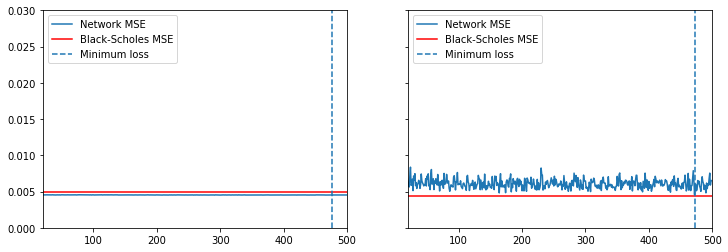

In [7]:
if not PERMUTE:

    # The loaded `df_train` set contains both the training and the validation set. So we need to split.
    df_val = df_train.loc[df_train['period0'] == 1]
    df_train = df_train.loc[df_train['period0'] == 0]


    """
    ##### Step 2: Choose feature and standardize
    Before data sets are fed to a network, all their features need to be standardized to 
    have zero mean and unit standard deviation.
    """
    use_fea = [x + '_t' for x in ori_fea] + ['cp_int']

    scaler = StandardScaler().fit(X=df_train[ori_fea])
    df_train, df_val = nw.standardize_feature([df_train, df_val], scaler, ori_fea)


    """
    ##### Step 3: Build a network and train it
    """
    sub_res_paths = {
        'ckp': sub_res_dirs['ckp'] + 'bestcp.h5',
        'history': sub_res_dirs['history'] + 'history.csv',
        'plot': sub_res_dirs['plot'] + 'losscurve.png'
    }
    history = nw.train_net_core(df_train, df_val, use_fea, hypers, sub_res_paths)    
    nw.plot_history(history, sub_res_paths['plot'], df_train, df_val)
    
    for i in range(NUM_TEST):
        df_test = mc_sets[i]

        [df_test] = nw.standardize_feature([df_test], scaler, ori_fea)
        delta = nw.test_net_core(df_test, use_fea, sub_res_paths)
    
        cm.store_pnl(
            df_test, delta,
            pnl_path=sub_res_dirs['pnl'] + f'pnl{i}.csv'
        )

### Permutations

In [8]:
"""
Prepare permutations.
"""
if PERMUTE:
    train_permutes, val_permutes, test_permutes = [], [], []
    for i in range(NUM_TEST):
        # the union of train and test
        df_permute = df_train.append(mc_sets[i], ignore_index=True, sort=False)
        df_permute = cm.permute_core(df_permute, 0, random_seed=i)

        df_train_permuted = df_permute.loc[df_permute['period0'] == 0]
        df_val_permuted = df_permute.loc[df_permute['period0'] == 1]
        df_test_permuted = df_permute.loc[df_permute['period0'] == 2]

        train_permutes.append(df_train_permuted.copy())
        val_permutes.append(df_val_permuted.copy())
        test_permutes.append(df_test_permuted.copy())
    del mc_sets

In [9]:
if PERMUTE:
    use_fea = [x + '_t' for x in ori_fea] + ['cp_int']
    for i in range(NUM_TEST):
        """
        ##### Step 2: Choose feature and standardize
        The difference of permuating version and the above version is:
        we standardize for each permutation.
        """
        scaler = StandardScaler().fit(X=train_permutes[i][ori_fea])
        train_permutes[i], val_permutes[i] = nw.standardize_feature([train_permutes[i], val_permutes[i]], scaler, ori_fea)
        
        """
        ##### Step 3: Build a network and train it
        """
        sub_res_paths = {
            'ckp': sub_res_dirs['ckp'] + f'bestcp{i}.h5',
            'history': sub_res_dirs['history'] + f'history{i}.csv',
            'plot': sub_res_dirs['plot'] + f'losscurve{i}.png'
        }
        history = nw.train_net_core(train_permutes[i], val_permutes[i], use_fea, hypers, sub_res_paths)
        nw.plot_history(history, sub_res_paths['plot'], train_permutes[i], val_permutes[i])

        """
        Test the network for only one permuted test set.
        """
        [test_permutes[i]] = nw.standardize_feature([test_permutes[i]], scaler, ori_fea)
        delta = nw.test_net_core(test_permutes[i], use_fea, sub_res_paths)
        cm.store_pnl(
            test_permutes[i], delta,
            pnl_path=sub_res_dirs['pnl'] + f'pnl{i}.csv'
        )

In [10]:

with open(f'{sub_res}additional_paras.txt', 'w+') as file:
    file.write('The following is network setup.\n')
    file.write(f'Date and time = {datetime.datetime.now()}\n')
    for n, x in [
        ('Random seed', seed),
        ('Features used', use_fea),
        ('Learning rate', hypers['lr']),
        ('L2 regularization alpha', hypers['reg_alpha']),
        ('Nodes per layer', hypers['nodes_per_layer']),
        ('Number of training epochs', hypers['epochs'])
    ]:
        file.write(f'{n} = {x}\n') 